# Machine Learning
> A Summary of lecture "Introduction to Computational Thinking and Data Science", via MITx:6.00.2x (edX)

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, edX, Machine Learning]
- image: 

- What is Machine Learning
    - Many useful programs learn something
> Note: "Field of study that gives computers the ability to learn without being explicitly programmed" - Arthur Samuel
    - Modern statistics meets optimization
    ![ml-block](images/ml-block.png)
- Basic Paradigm
    - Observe set of examples: **training data**
    - Infer something about process that generated that data
    - Use inference to make predictions about previously unseen data: **test data**
- All ML Methods Require
    - Representation of the features
    - Distance metric for feature vectors
    - Objective function and constraints
    - Optimization method for learning the model
    - Evaluation method
- Supervised Learning
    - Start with set of feature vector / value pairs
    - Goal : find a model that predicts a value for a previously unseen feature vector
    - **Regression** models predict a real
        - E.g. linear regression
    - **Classification** models predict a label (chosen from a finite set of labels)
- Unsupervied Learning
    - Start with a set of feature vectors
    - Goal : uncover some latent structure in the set of feature vectors
    - **Clustering** the most common technique
        - Define some metric that captures how similar one feature vector is to another
        - Group examples based on this metric
- Choosing Features
    - Features never fully describe the situation
    - Feature Engineering
        - Represent examples by feature vectors that will facilitate generalization
        - Suppose I want to use 100 examples from past to predict which students will pass the final exam
        - Some features surely helpful, e.g., their grade on the midterm, did they do the problem sets, etc.
        - Others might cause me to overfit, e.g., birth month
    - Whant to maximize ratio of useful input to irrelevant input
        - Signal-to-Noise Ratio (SNR)

- K-Nearest Neighbors
    - Distance between vectors
        - Minkowski metric
        $$ dist(X_1, X_2, p) = (\sum_{k=1}^{len}abs({X_1}_k - {X_2}_k)^p)^{\frac{1}{p}} \\
        p=1 : \text{Manhattan Distance} \\
        p=2 : \text{Euclidean Distance}$$

In [1]:
from lecture12_segment2 import *

In [4]:
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,2])
alligator = Animal('alligator', [1,1,0,1,4])
dartFrog = Animal('dart frog', [1,0,1,0,4])
zebra = Animal('zebra', [0,0,0,0,4])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])
animals = [cobra, rattlesnake, boa, chicken, guppy,
           dartFrog, zebra, python, alligator]

Help on method scale in module matplotlib.table:

scale(xscale, yscale) method of matplotlib.table.Table instance
    Scale column widths by *xscale* and row heights by *yscale*.



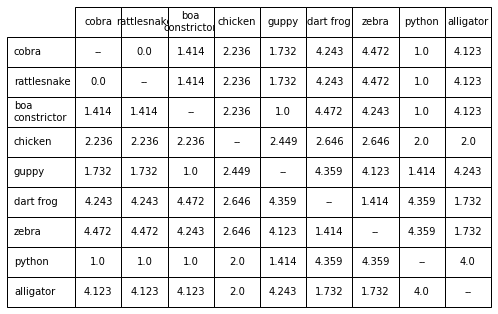

In [5]:
compareAnimals(animals, 3) # k=3

- Using Distance Matrix for classification
    - Simplest approach is probably nearest neighbor
    - Remember training data
    - When predicting the label of a new example
        - Find the nearest example in the training data
        - Predict the label associated with that example
- Advantage and Disadvantage of KNN
    - Advantages
        - Learning fase, no explicit training
        - No theory required
        - Easy to explain method and results
    - Disadvantages
        - Memory intensive and predictions can take a long time
            - Are better algorithms than brute force
        - No model to shed light on process that generated data

In [6]:
# Applying scaling
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,2])
alligator = Animal('alligator', [1,1,0,1,1])
dartFrog = Animal('dart frog', [1,0,1,0,1])
zebra = Animal('zebra', [0,0,0,0,1])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])
animals = [cobra, rattlesnake, boa, chicken, guppy,
          dartFrog, zebra, python, alligator]

Help on method scale in module matplotlib.table:

scale(xscale, yscale) method of matplotlib.table.Table instance
    Scale column widths by *xscale* and row heights by *yscale*.



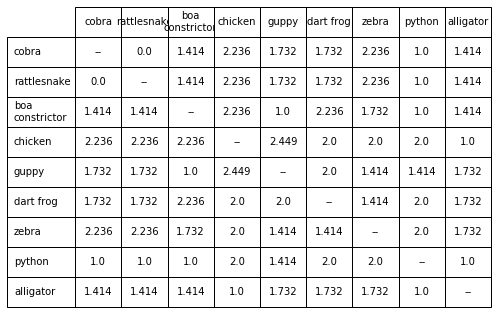

In [7]:
compareAnimals(animals, 3) k = 3

- A more General Approach: Scaling
    - Z-scaling
        - Each feature has a mean of 0 & a standard deviation of 1
    - Interpolation
        - Map minimum value to 0, maximum value to 1, and linearly interpolate
```python
def zScaleFeatures(vals):
    """Assumes vals is a sequence of floats"""
    result = np.array(vals)
    mean = np.mean(vals)
    result = result - mean
    return result/np.std(result)

def iScaleFeatures(vals):
    """Assumes vals is a sequence of floats"""
    minVal, maxVal = min(vals), max(vals)
    fit = np.polyfit([minVal, maxVal], [0, 1], 1)
    return np.polyval(fit, vals)
```

- Clustering
    - Partition examples into groups (clusters) such that examples in a group are more similar to each other than to examples in other groups
    - Unlike classification, there is not typically a "right answer"
        - Answer dictated by feature vector and distance metric, not by a group truth label
- Optimization Problem
$$ variability(c) = \sum_{e \in c} distance(mean(c), e)^2 \\
dissimilarity(C) = \sum_{c \in C} variability(c) \\
c :\text{one cluster} \\
C : \text{all of the clusters}$$
    - Why not divide variability by size of cluster?
        - Big and bad worse than small and bad
    - Is optimization problem finding a $C$ that minimizes $dissimilarity(C)$?
        - No, otherwise could put each example in its own cluster
    - Need constraints, e.g.
        - Minimum distance between clusters
        - Number of clusters
- K-means Clustering
    - Constraint: exactly k non-empty clusters
    - Use a greedy algorithm to find an approximation to minimizing objective function
- Algorithm
```
randomly chose k examples as initial centroids
while true:
    create k clusters by assigning each example to closest centroid
    compute k new centroids by averaging examples in each cluster
    if centroids don`t change:
        break
```

In [8]:
from lecture12_segment3 import *

Iteration #1
Cluster color = 0
Cluster with centroid [1.66014278 3.18525178] contains:
  (2, 3)-1
Cluster color = 1
Cluster with centroid [1.8494407 2.7367613] contains:
  (2, 3)-0, (2, 3)-2, (2, 3)-3, (2, 3)-4
Cluster color = 2
Cluster with centroid [5.57612073 6.33385138] contains:
  (4, 6)-0, (4, 6)-1, (4, 6)-2, (4, 6)-3, (4, 6)-4, (7, 7)-0, (7, 7)-1, (7, 7)-2, (7, 7)-3, (7, 7)-4
Cluster color = 3
Cluster with centroid [7.11402489 3.98797723] contains:
  (7, 4)-0, (7, 4)-1, (7, 4)-2, (7, 4)-3, (7, 4)-4

Iteration #2
Cluster color = 0
Cluster with centroid [1.49914988 3.08204521] contains:
  (2, 3)-1, (2, 3)-2, (2, 3)-4
Cluster color = 1
Cluster with centroid [2.28022797 2.44308067] contains:
  (2, 3)-0, (2, 3)-3
Cluster color = 2
Cluster with centroid [5.57612073 6.33385138] contains:
  (4, 6)-0, (4, 6)-1, (4, 6)-2, (4, 6)-3, (4, 6)-4, (7, 7)-0, (7, 7)-1, (7, 7)-2, (7, 7)-3, (7, 7)-4
Cluster color = 3
Cluster with centroid [7.11402489 3.98797723] contains:
  (7, 4)-0, (7, 4)-1, (7, 

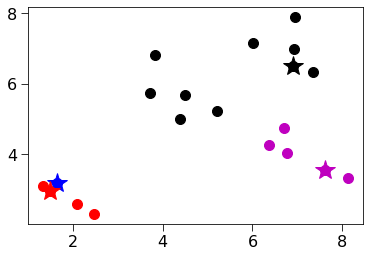

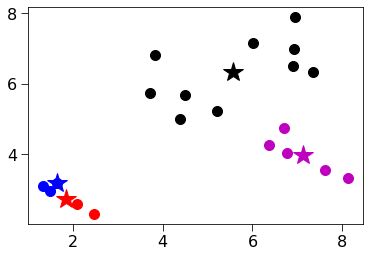

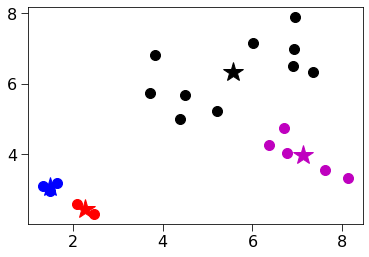

In [10]:
centers = [(2, 3), (4, 6), (7, 4), (7,7)]
examples = []
random.seed(0)
for c in centers:
    for i in range(5):
        xVal = (c[0] + random.gauss(0, .5))
        yVal = (c[1] + random.gauss(0, .5))
        name = str(c) + '-' + str(i)
        example = Example(name, pylab.array([xVal, yVal]))
        examples.append(example)

xVals, yVals = [], []
for e in examples:
    xVals.append(e.getFeatures()[0])
    yVals.append(e.getFeatures()[1])

random.seed(2)
kmeans(examples, 4, True)   

- Mitigating Dependence on Initial Centroids
```python
best = kMeans(points)
for t in range(numTrials):
    C = kMeans(points)
    if dissimilarity(C) < dissimilarity(best):
        best = C
return best
```
- A Pretty Example
    - User k-means to cluster groups of pixels in an image by their color
    - Get the color associated with the centroid of each cluster, i.e., the average color of the cluster
    - For each pixel in the original image, find the centroid that is its nearest neighbor
    - Replaced the pixel by that centroid